In [1]:
!python --version

Python 3.9.1


# Making an HR Diagram with Hipparcos Dataset
- The goal of this tutorial is to show how exploratory data analysis (EDA) could be performed using python, on the original Hipparcos catalog. The EDA is best started with a Hertzsprung-Russel Diagram (HRD) which shows the relationship between the temperature and luminosity, or absolute magnitude and color index between stars.

### The Hipparcos Dataset

<img src="https://sci.esa.int/star_mapper/img/b63db3f5fdfa2a35cd693c39d6ace9d8.png" style="width: 600px;"/>

From the [European Space Agency website:](https://sci.esa.int/web/hipparcos)



>Unique to Europe was the very first space mission for measuring the **positions, distances, motions, brightness and colours of stars** - for astrometry, as the experts call it. ESA's Hipparcos satellite pinpointed more than **100 000 stars**, 200 times more accurately than ever before. As astrometry has been the bedrock of the study of the Universe since ancient times, this leap forward has affected every branch of astronomy. The primary product from this pioneering and successful mission was a set of stellar catalogues, The **Hipparcos** and Tycho Catalogues, published by ESA in 1997.  

**Example of Research done using Hipparcos Dataset**

Paper Title:
[Cosmography of OB stars in the solar neighbourhood](https://www.aanda.org/articles/aa/abs/2015/12/aa27058-15/aa27058-15.html)

### Notable columns:

__1. `HIP`__
   - Hipparcos number/identifier; this is the ID number of any star within the Hipparcos catalog. We will use this number as the index of our dataframe.
   
__2. `RAICRS` & `DEICRS`__
   - Right Ascension and Declination in equatorial coordinates in degrees. (ICRS, Epoch=J1991.25)
    
<img src="http://www.pas.rochester.edu/~blackman/ast104/celestialtime.gif" />
<center><em>Image credit: http://www.pas.rochester.edu/~blackman/ast104/celestialtime.gif </em></center>


__3. `Vmag`__
   - Visual Magnitude; this tells us how bright a star, or generally any celestial object as it is viewed from the Earth.
    
<img src="https://en.es-static.us/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg" />
<center><em>Image credit: https://en.es-static.us/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg </em></center>

__4. `Plx`__ 
   - Parallax angle in milliarcseconds; distance (in parsecs) from Earth/Sun to a Star using trigonometric parallax. Earth-Sun distance is negligible compared to distance between stars.

<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/imgast/Stelpar.gif" />
<center><em>Image credit: http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/imgast/Stelpar.gif </em></center>

__5. `B-V`__ 
   - Color index, Blue to Visible region of the EM spectrum; indicates the color of the star, which is correlated to its temperature. 
   
   Table values from: [What color are the stars?](http://www.vendian.org/mncharity/dir3/starcolor/details.html)
    
<img src="https://www.esri.com/arcgis-blog/wp-content/uploads/2018/03/colorChart2.png" />

__6. `SpType`__

   - Spectral Type. The classification of O,B,A,F,G,K,M stars based on temperature.

<img src="https://pages.uoregon.edu/jimbrau/BrauImNew/Chap17/FG17_t02.jpg" />
<center><em>Image credit: https://pages.uoregon.edu/jimbrau/BrauImNew/Chap17/FG17_t02.jpg </em></center>

### Required libraries

- We need to install the following libraries to execute the 2D plot. 
    - [`Numpy`](https://numpy.org/) and [`pandas`](https://pandas.pydata.org/) are both used for numerical and dataframe-based analysis, and `Matplotlib` to create the HR diagram.

- [`Astroquery`](https://astroquery.readthedocs.io/en/latest/) is used to access the [VizieR web service](https://vizier.u-strasbg.fr/) in order to download the Hipparcos catalog.
- [`Astropy`](https://www.astropy.org/) is used to make routine astrophysical computations easier.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from astroquery.vizier import Vizier
from astropy.table import Table

Vizier.ROW_LIMIT = -1

- We select only the columns that we need and put them into a DataFrame using Pandas.
- The dataset has a total of 118,218 rows/stars, and setting `Vizier.ROW_LIMIT = -1` allows us to download the catalog at its full length, instead of just 50 rows.

# I. Downloading the Hipparcos dataset using [`VizieR`](https://vizier.u-strasbg.fr/)

- The [The Hipparcos Main Catalogue](https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html) can be queried directly from [the Vizier website](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/239/hip_main). 

- We select only the columns that we need, which are mentioned above, for the HRD and put them into a DataFrame using Pandas.

- However, the `RAICRS` and `DEICRS` columns will be useful for our future plotting tutorials.

In [4]:
hip = ['HIP',
       'RAICRS', 'DEICRS', 
       'Vmag', 'Plx',
       'B-V', 'SpType']
I239 = Vizier(columns=hip, catalog='I/239/hip_main', row_limit=-1).query_constraints()
hip = I239[0]
hip_df = hip.to_pandas()
hip_df

,HIP,RAICRS,DEICRS,Vmag,Plx,B-V,SpType
0,1,0.000912,1.089013,9.10,3.540000,0.482,F5
1,2,0.003797,-19.498837,9.27,21.900000,0.999,K3V
2,3,0.005008,38.859286,6.61,2.810000,-0.019,B9
3,4,0.008382,-51.893546,8.06,7.750000,0.370,F0V
4,5,0.009965,-40.591224,8.55,2.870000,0.902,G8III
...,...,...,...,...,...,...,...
118213,118318,359.963744,11.673709,6.99,1.920000,1.595,K2
118214,118319,359.973913,-22.428180,8.23,10.630000,0.639,G2V
118215,118320,359.976057,5.956638,7.59,5.000000,0.999,K0
118216,118321,359.978239,-64.372572,9.20,19.219999,0.698,G5V


- Inspect the data types.

In [5]:
hip_df.dtypes

HIP         int32
RAICRS    float64
DEICRS    float64
Vmag      float32
Plx       float32
B-V       float32
SpType     object
dtype: object

### Create directories

- This will help us organize our generated files.

In [6]:
import os

In [7]:
try:
    os.makedirs('Data//df')
except OSError:
    pass

try:
    os.makedirs('Data//img')
except OSError:
    pass

# II. Creating New Columns

We'll "expand" the Hipparcos dataset by creating new columns for the `distance in pc` and `absolute magnitude`.

### A. Distance in parsec `Pc`

Create new column for distance $d$, which is `Pc` and is based on parallax angles $\varpi$. Note that the parallax angles are given in milliarcseconds (mas), so therefore we have to multiply by 1000, therefore:

\begin{equation}
    d = 1000 \cdot \frac{1}{\varpi}
\end{equation}

- Thus, we generate the column `Pc`:

In [8]:
hip_df['Pc'] = 1000/hip_df['Plx']
hip_df.head()

,HIP,RAICRS,DEICRS,Vmag,Plx,B-V,SpType,Pc
0,1,0.000912,1.089013,9.10,3.54,0.482,F5,282.485870
1,2,0.003797,-19.498837,9.27,21.90,0.999,K3V,45.662102
2,3,0.005008,38.859286,6.61,2.81,-0.019,B9,355.871887
3,4,0.008382,-51.893546,8.06,7.75,0.370,F0V,129.032257
4,5,0.009965,-40.591224,8.55,2.87,0.902,G8III,348.432068


### B. Add absolute magnitude column `Absmag`

The absolute magnitude of a star is its "brightness" if it was placed 10 parsecs from Earth. In relation to the apparent/visual magnitude $m$ and distance from Earth in parsecs $d$, the absolute magnitude $M$ is given by:

$$ m-M=5\log_{10} \bigg(\frac{d}{10}\bigg) $$

- Thus, for the `Absmag` column:

In [9]:
hip_df['AbsMag'] = hip_df['Vmag'] - 5*np.log10(hip_df['Pc']/10)
#hip_df['AbsMag'] = hip_df[hip_df['AbsMag']!=-np.inf]

C:\Users\Lanz\anaconda3\envs\astro_env\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### C. Add Effective Temperature column `EffTemp`

To solve for the Effective temperature, we use [Ballesteros' formula](https://arxiv.org/pdf/1201.1809.pdf), 


$$ T= 4600 K \bigg({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\bigg) $$

which was obtained by considering stars as black bodies. Fortunately, this equation has a [PyAstronomy](https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/aslExt_1Doc/ramirez2005.html) implementation.

In [10]:
from PyAstronomy import pyasl

b = pyasl.BallesterosBV_T()

hip_df['EffTemp']= b.bv2T(hip_df['B-V'])

### D. Add Luminosity column ```Lum```

The Luminosity of any star $L$ and its absolute magnitude $M$ is related to our Sun's Luminosty $L_{\odot}$ and absolute magnitude $M_{\odot}$ by:

$$M-M_{\odot} = -2.5 \log_{10} \bigg(\frac{L}{L_{\odot}}\bigg)$$

Rearranging in terms of $L$:

$$ L = L_{\odot} 10^{\frac{M_{\odot}-M}{2.5}} $$

In [11]:
from astropy.constants import iau2012 as const

In [12]:
L_sun = const.L_sun.value
Absmag_sun = 4.74

hip_df['Lum'] = L_sun*10**((Absmag_sun-hip_df['AbsMag'])/2.5)

- Save as `.csv` for future purposes.

In [13]:
hip_df.to_csv('Data\\df\\hipparcos_filtered.csv')

# III. Plotting

- Try to replicate the HR diagram from the [Australian Telescope National Facility](https://www.atnf.csiro.au/outreach/education/senior/cosmicengine/stars_hrdiagram.html):

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/hrdiagram1.jpg" />

<center><em>Image credit: CSIRO </em></center>

- Remove rows of `B-V`, `AbsMag`, `SpType` columns that have null values.
- `B-V` and `AbsMag` columns would suffice, but plotting with `EffTempt` and `Lum` is also possible.

In [14]:
hip_BV_df = hip_df[['B-V', 'AbsMag', 'SpType']].dropna()

In [15]:
from matplotlib.colors import ListedColormap

- Create a custom plotter function for stylized 2D-plots.

In [16]:
def scatter_2D(x, y, fig=None, ax=None, c='k', s=0.1, *args, **kwargs):
    
    if (fig or ax) is None:
        fig, ax = plt.subplots()
    
    plot = ax.scatter(x, y, c=c, s=s, *args, **kwargs)
    
    #axes styling
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=True, bottom=True,
                   labelleft=True, labelbottom=True)

### A. Initial plot of the HRD

- We generate a simple colorless HR diagram to view the distribution of stars.

Text(0, 0.5, 'Absolute Magnitude $M$')

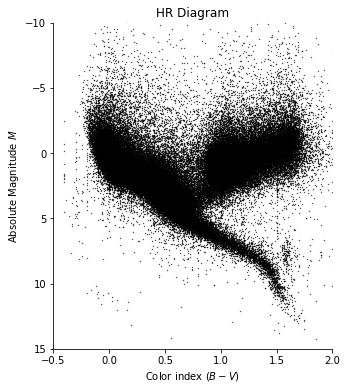

In [17]:
fig, ax = plt.subplots(figsize=(5,6))

scatter_2D(hip_BV_df['B-V'], hip_BV_df['AbsMag'], ax=ax)
ax.set_xlim(-0.5,2.0)
ax.set_ylim(15,-10)
ax.set_title('HR Diagram')
ax.set_xlabel('Color index $(B-V)$')
ax.set_ylabel('Absolute Magnitude $M$')

### B. Colored HRD with `RdYlBu_r` colors

- Stylize the HRD with `RdYlBu_r colors` to match the B-V color index.

In [18]:
from matplotlib import colors

In [19]:
divnorm = colors.TwoSlopeNorm(vmin=-0.4, vcenter=0.4, vmax=2.0)

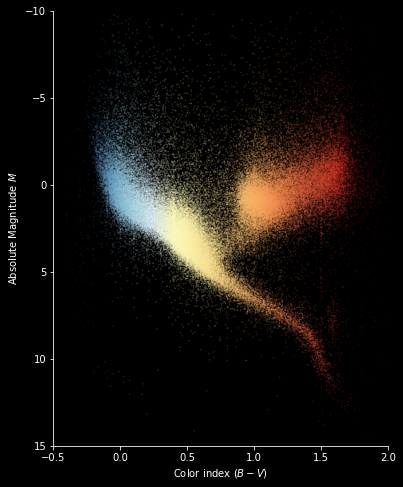

In [20]:
import matplotlib as mpl

with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(figsize=(6,8))

    scatter_2D(hip_BV_df['B-V'], hip_BV_df['AbsMag'], ax=ax, 
               c=hip_BV_df['B-V'], cmap='RdYlBu_r', norm=divnorm, alpha=0.3)

    ax.set(xlabel='Color index $(B-V)$', ylabel='Absolute Magnitude $M$', 
           xlim=(-0.5,2.0), ylim=(15,-10))

### C. Colored HRD with their B-V index colors

Separate spectral classes OBAFGKM.

- Define each spectral class and assign their specific colors from the B-V color index in the introductory portion above.

In [21]:
#hip_OB_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("O","B")) == True]
hip_O_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("O")) == True]
hip_B_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("B")) == True]
hip_A_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("A")) == True]
hip_F_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("F")) == True]
hip_G_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("G")) == True]
hip_K_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("K")) == True]
hip_M_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("M")) == True]

sptype_len_list = [hip_O_df, hip_B_df, hip_A_df, hip_F_df, hip_G_df, hip_K_df, hip_M_df]
sptype_list = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
col_list = ['#9bb2ff', '#a7bcff', '#d1dbff', '#f7f5ff', '#fff3ea', '#ffead5', '#ffcf95']

- Check how many stars each spectral type have and see if they match the visualized data.

In [22]:
for i,j in zip(sptype_len_list, sptype_list):
    print("Type {}: {} stars".format(j, len(i)))

Type O: 190 stars
Type B: 9561 stars
Type A: 18188 stars
Type F: 25038 stars
Type G: 22172 stars
Type K: 30801 stars
Type M: 4449 stars


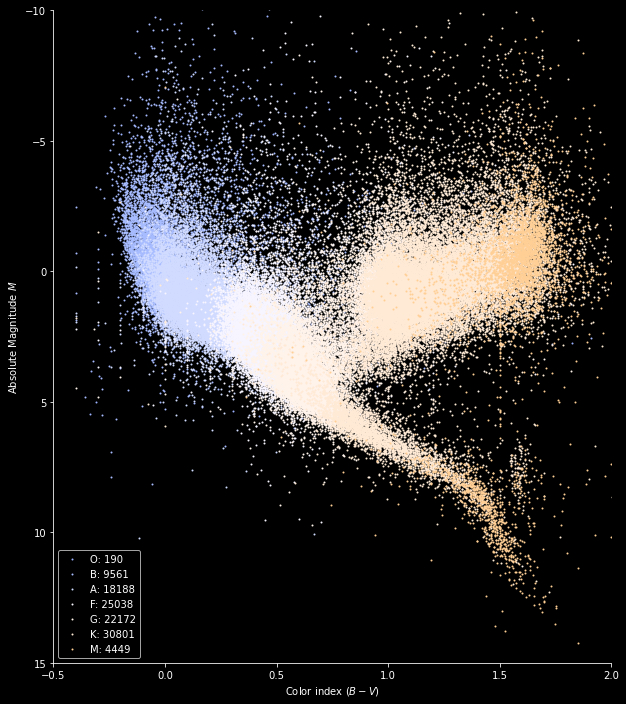

In [23]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10,12))

    for df,label,color in zip(sptype_len_list, sptype_list, col_list):

        scatter_2D(df['B-V'], df['AbsMag'], ax=ax, c=color, s=1, 
                   label='{}: {}'.format(label, len(df)))

    ax.set(xlabel='Color index $(B-V)$', ylabel='Absolute Magnitude $M$', 
           xlim=(-0.5,2.0), ylim=(15,-10))
    ax.legend()

- Unfortunately, it is still hard to distinguish between consecutive spectral types.

### D. Plot each spectral type separately

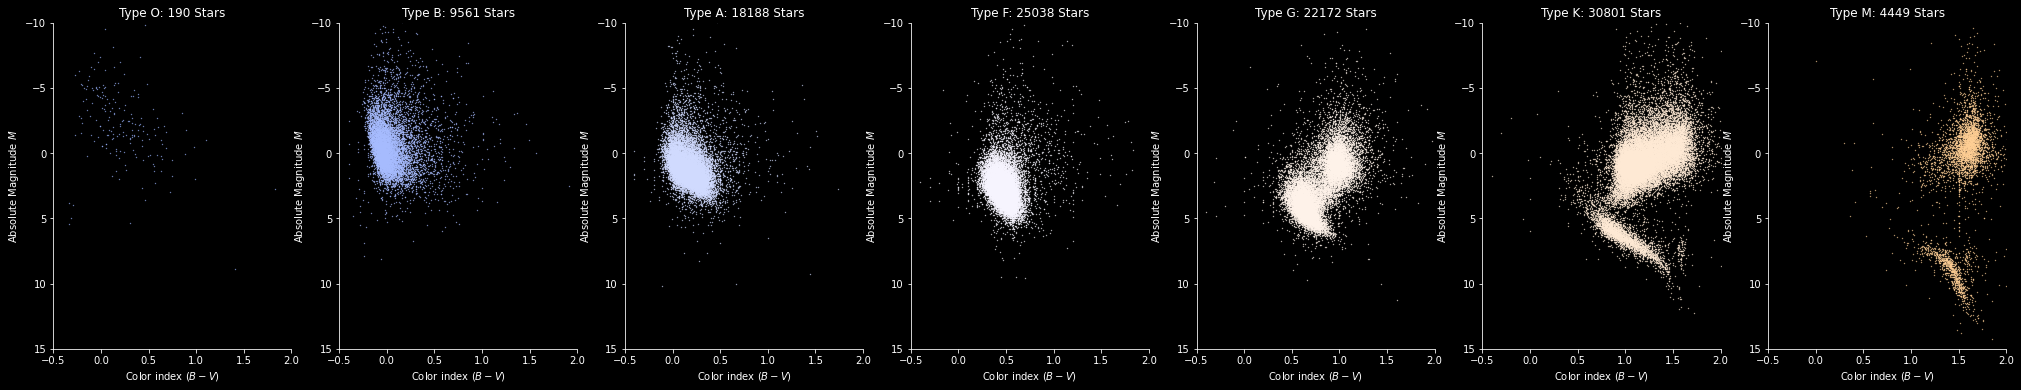

In [24]:
with plt.style.context('dark_background'):
    
    fig, axs = plt.subplots(1,7, figsize=(35,6))
    for df, label, color, ax in zip(sptype_len_list, sptype_list, col_list, axs.reshape(-1)):
        scatter_2D(df['B-V'], df['AbsMag'], ax=ax, 
                   c=color)

        ax.set(title='Type {}: {} Stars'.format(label, len(df)), 
               xlabel='Color index $(B-V)$', 
               ylabel='Absolute Magnitude $M$', 
               xlim=(-0.5,2.0), ylim=(15,-10))